# CSCA 5632 Final Project

This project will use unsupervised learning algorithms to gain insight into how smoking may be related to gene expression. The data is sourced from [Thomas Konstantin on Kaggle](https://www.kaggle.com/datasets/thomaskonstantin/cpg-values-of-smoking-and-non-smoking-patients) and includes age, gender, smoking status, and a percentage of CpG sites that are methylated for a given gene, across 20 different genes. 

## EDA

To start, we will explore the data including the number of observations, the number of variables and their types, and some trends.

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn
from sklearn.decomposition import NMF, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
import time

In [2]:
data = pd.read_csv('data/Smoker_Epigenetic_df.csv')

data.head()

,GSM,Smoking Status,Gender,Age,cg00050873,cg00212031,cg00213748,cg00214611,cg00455876,cg01707559,...,cg02494853,cg02839557,cg02842889,cg03052502,cg03155755,cg03244189,cg03443143,cg03683899,cg03695421,cg03706273
0,GSM1051525,current,f,67,0.607563,0.422843,0.372455,0.621562,0.290777,0.267143,...,0.067070,0.246993,0.469240,0.400247,0.415031,0.221433,0.475826,0.207724,0.209197,0.129983
1,GSM1051526,current,f,49,0.345054,0.568662,0.500600,0.498607,0.374591,0.190274,...,0.046939,0.236742,0.307467,0.377031,0.397371,0.217122,0.544469,0.184446,0.193773,0.098533
2,GSM1051527,current,f,53,0.321350,0.360909,0.352732,0.373824,0.230674,0.314705,...,0.038237,0.244612,0.357753,0.305044,0.521278,0.185049,0.537060,0.393123,0.268003,0.040248
3,GSM1051528,current,f,62,0.277268,0.304437,0.475235,0.486258,0.295181,0.295793,...,0.026716,0.001641,0.445739,0.271475,0.434492,0.165419,0.507917,0.281209,0.217857,0.101516
4,GSM1051529,never,f,33,0.413599,0.131251,0.367545,0.761167,0.235770,0.250526,...,0.037016,0.334320,0.395040,0.326553,0.430097,0.181135,0.405479,0.310794,0.280071,0.077857


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GSM             683 non-null    object 
 1   Smoking Status  683 non-null    object 
 2   Gender          683 non-null    object 
 3   Age             683 non-null    int64  
 4   cg00050873      621 non-null    float64
 5   cg00212031      621 non-null    float64
 6   cg00213748      621 non-null    float64
 7   cg00214611      621 non-null    float64
 8   cg00455876      621 non-null    float64
 9   cg01707559      621 non-null    float64
 10  cg02004872      621 non-null    float64
 11  cg02011394      621 non-null    float64
 12  cg02050847      621 non-null    float64
 13  cg02233190      621 non-null    float64
 14  cg02494853      621 non-null    float64
 15  cg02839557      621 non-null    float64
 16  cg02842889      621 non-null    float64
 17  cg03052502      621 non-null    flo

In [4]:
data = data.dropna(axis = 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 621 entries, 0 to 620
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   GSM             621 non-null    object 
 1   Smoking Status  621 non-null    object 
 2   Gender          621 non-null    object 
 3   Age             621 non-null    int64  
 4   cg00050873      621 non-null    float64
 5   cg00212031      621 non-null    float64
 6   cg00213748      621 non-null    float64
 7   cg00214611      621 non-null    float64
 8   cg00455876      621 non-null    float64
 9   cg01707559      621 non-null    float64
 10  cg02004872      621 non-null    float64
 11  cg02011394      621 non-null    float64
 12  cg02050847      621 non-null    float64
 13  cg02233190      621 non-null    float64
 14  cg02494853      621 non-null    float64
 15  cg02839557      621 non-null    float64
 16  cg02842889      621 non-null    float64
 17  cg03052502      621 non-null    float64


Based on the first `info()` call above, we can see that there are 683 records, however only 621 records do not have null values for the gene expression columns. By dropping any observations with null values, we still maintain the expected 621 records. The data includes 24 columns. The first, `GSM` is an identifier for the record, and will not be included in analysis. `Smoking Status` is the label we will eventually try to predict, and so it will be separated out before any model training begins.

<Figure size 640x480 with 0 Axes>

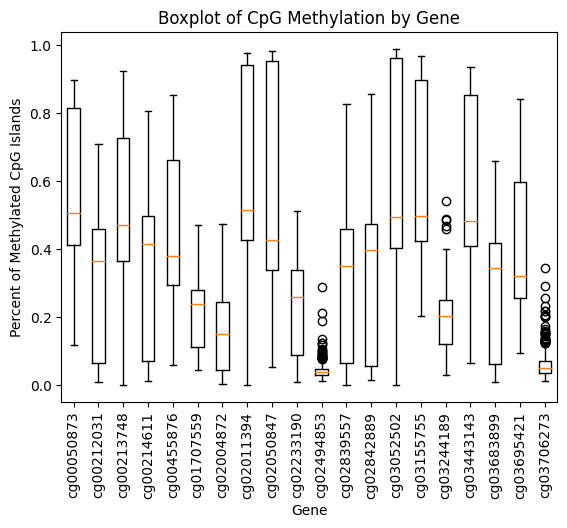

<Figure size 640x480 with 0 Axes>

In [5]:
data_y = data['Smoking Status']
data_x = data.drop(['GSM', 'Smoking Status'], axis=1)
gene_columns = [column for column in data_x.columns if column[0] == 'c']
gene_values = [data_x[column] for column in gene_columns]
plt.boxplot(gene_values, labels=gene_columns)
plt.xticks(rotation=90)
plt.title('Boxplot of CpG Methylation by Gene')
plt.ylabel('Percent of Methylated CpG Islands')
plt.xlabel('Gene')
plt.figure()

<Figure size 640x480 with 0 Axes>

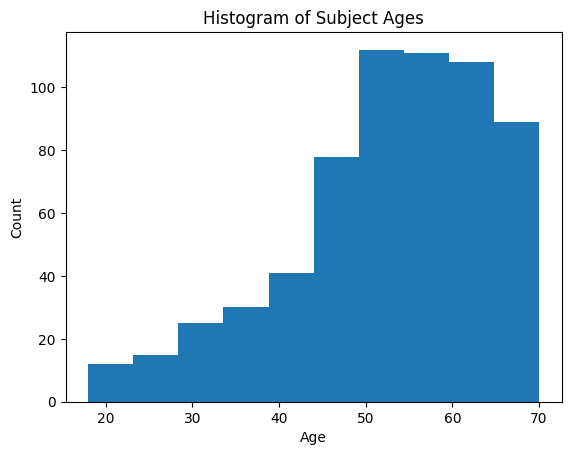

<Figure size 640x480 with 0 Axes>

In [6]:
plt.hist(data_x['Age'])
plt.title('Histogram of Subject Ages')
plt.ylabel('Count')
plt.xlabel('Age')
plt.figure()

Gender
 f    440
 m    181
Name: Gender, dtype: int64


<Axes: xlabel='Gender'>

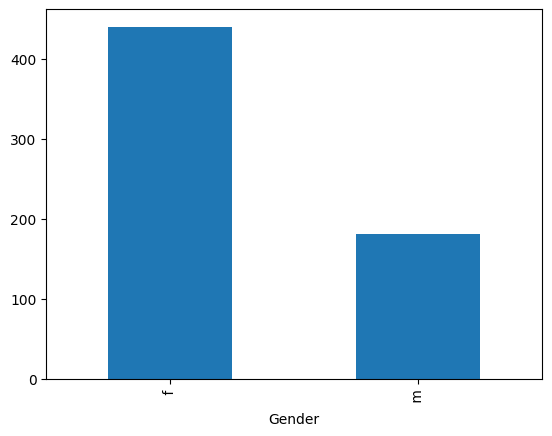

In [7]:
gender_counts = data_x.groupby('Gender')['Gender'].count()
print(gender_counts)
gender_counts.plot.bar()

['current' 'never'] [428 193]


<Figure size 640x480 with 0 Axes>

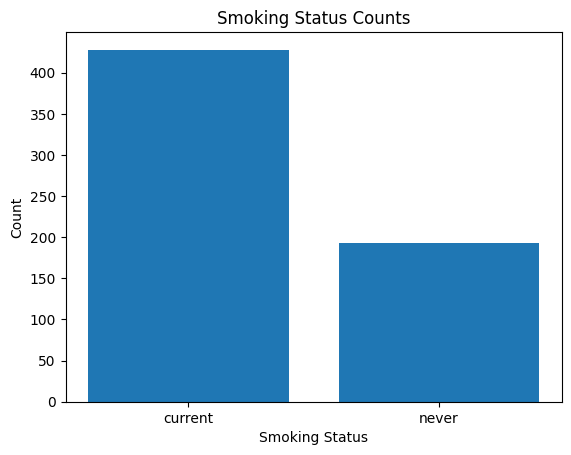

<Figure size 640x480 with 0 Axes>

In [8]:
statuses, status_counts = np.unique(data_y, return_counts=True)
print(statuses, status_counts)
plt.bar(statuses, status_counts)
plt.xlabel("Smoking Status")
plt.ylabel("Count")
plt.title("Smoking Status Counts")
plt.figure()

## EDA Discussion

After removing null values, we can see that the gene expression variables, despite all being within the range `0` to `1`, vary greatly in their distributions. We will want to normalize these values prior to any model analysis. 

For age, the data is centered around the 50-60 range, and is left skewed. This, too, will be normalized before any model training occurs.

Female subjects outnumber male subjects 440 to 181. Gender will be encoded to numeric values for analysis.

Current smokers outnumber nonsmokers 428 to 193.

In [9]:
data_x.Gender = pd.Categorical(data_x.Gender)
data_x['Gender_code'] = data_x.Gender.cat.codes
data_x = data_x.drop('Gender', axis=1)

## Model 1: PCA

The first unsupervised learning method we will use is PCA. In this dataset, there aren't too many features for most types of analysis, however there is also no intuitive difference between the different genes and how they may be related to smoking status. This will help us extract the most influential features of the dataset, which can be helpful to know even if no further analysis is conducted. Particularly in the field of genetics, it may be helpful to know early on if certain genes are worth monitoring further, or if that attention would be better served elsewhere.

In [10]:
scaler = StandardScaler()

scaled_x = scaler.fit_transform(data_x)

principal = PCA(n_components=10)

pca_out = principal.fit_transform(scaled_x)

In [11]:
explained_var = principal.explained_variance_ratio_
explained_var_cum = np.cumsum(explained_var)
print(explained_var)
print(explained_var_cum)

[0.70780007 0.07674969 0.04311046 0.0392383  0.01649581 0.01358974
 0.01081861 0.01047162 0.01000804 0.00863601]
[0.70780007 0.78454975 0.82766021 0.86689851 0.88339432 0.89698405
 0.90780266 0.91827428 0.92828232 0.93691833]


<Figure size 640x480 with 0 Axes>

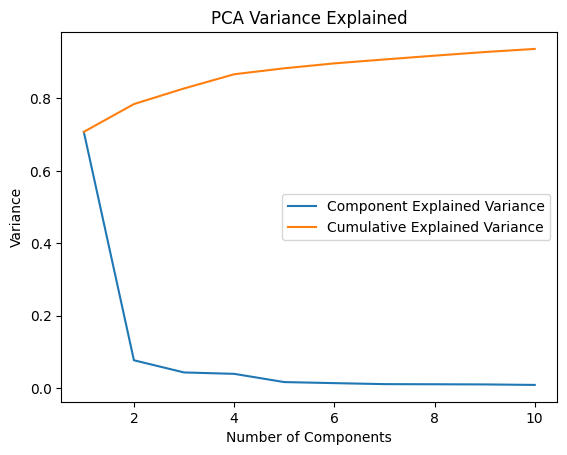

<Figure size 640x480 with 0 Axes>

In [12]:
plt.plot(range(1,11), explained_var, label='Component Explained Variance')
plt.plot(range(1,11), explained_var_cum, label='Cumulative Explained Variance')
plt.ylabel('Variance')
plt.xlabel('Number of Components')
plt.title('PCA Variance Explained')
plt.legend()
plt.figure()

## PCA Explained Variance

The figure above shows the explained variance and cumulative explained variance for each of 10 principal components. The first component explains 72% of the variance in the data, followed by just 0.075% for the second component. Because of how steep this drop is, we will focus analysis on only the first two principal component, since each successive component explans less of the variance.

In [13]:
abs_scores = np.abs(principal.components_[0:2])
pc1_indices = np.argsort(abs_scores[0])[-5:]
pc1_top_features = np.array(data_x.columns)[pc1_indices]

pc2_indices = np.argsort(abs_scores[1])[-5:]
pc2_top_features = np.array(data_x.columns)[pc2_indices]

print(pc1_top_features)
print(pc2_top_features)

['cg03052502' 'cg02842889' 'cg02050847' 'cg03155755' 'Gender_code']
['cg03695421' 'cg03244189' 'Age' 'cg03706273' 'cg02494853']


## PCA Result

For the first principal component, the gene `cg03052502` was the most influential feature, followed by gene `cg02842889`. For the second component, the two most influential features were genes `cg03695421` and `cg03244189`. While this does not necessarily give insight into how the methylation of these genes is related to smoking status, it can give researchers a hint as to where to begin looking for relationships

## Model 2: Hierarchical Clustering

Next, we will focus on a model with the goal of categorizing smokers vs non-smokers. The first attempt at classification will use Hierarchical Clustering, with Scikit-Learn's `AgglomerativeClustering`. We will use the scaled output generated by `StandardScaler` for this analysis.

In [14]:

yt = np.array(data_y)
#print(yt)

def get_model_accuracy(labels):
    smoke_1 = np.array(['current' if x == 1 else 'never' for x in labels])
    smoke_0 = np.array(['current' if x == 0 else 'never' for x in labels])
    acc_1 = np.mean(smoke_1 == yt)
    acc_0 = np.mean(smoke_0 == yt)

    return (acc_1, smoke_1) if acc_1 > acc_0 else (acc_0, smoke_0)


linkage_methods = ['ward', 'complete', 'average', 'single']
distance_metrics = ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']
best_acc = 0
best_metric = None
best_linkage = None
best_preds = None
for i in range(len(linkage_methods)):
    for j in range(len(distance_metrics)):
        linkage = linkage_methods[i]
        metric = distance_metrics[j]
        
        if metric == 'euclidean' or linkage != 'ward':
            current_model=AgglomerativeClustering(n_clusters=2, metric=metric, linkage=linkage)
            start_time = time.time()
            current_model.fit(data_x)
            end_time = time.time()
            (acc, preds) = get_model_accuracy(current_model.labels_)
            print(f'Accuracy for {metric} distance metric, with {linkage} linkage: {acc}. Time Taken: {end_time - start_time} seconds')
            if acc > best_acc:
                best_acc = acc
                best_metric = metric
                best_linkage = linkage
                best_preds = preds

print(f'\nThe most accurate model was {best_metric} distance with {best_linkage} linkage, having a final accuracy of {best_acc}')

Accuracy for euclidean distance metric, with ward linkage: 0.5764895330112721. Time Taken: 0.009514093399047852 seconds
Accuracy for euclidean distance metric, with complete linkage: 0.6956521739130435. Time Taken: 0.006123065948486328 seconds
Accuracy for l1 distance metric, with complete linkage: 0.6489533011272142. Time Taken: 0.00556492805480957 seconds
Accuracy for l2 distance metric, with complete linkage: 0.6956521739130435. Time Taken: 0.005054950714111328 seconds
Accuracy for manhattan distance metric, with complete linkage: 0.6489533011272142. Time Taken: 0.005166053771972656 seconds
Accuracy for cosine distance metric, with complete linkage: 0.6940418679549114. Time Taken: 0.006017923355102539 seconds
Accuracy for euclidean distance metric, with average linkage: 0.6570048309178744. Time Taken: 0.004979133605957031 seconds
Accuracy for l1 distance metric, with average linkage: 0.644122383252818. Time Taken: 0.005035877227783203 seconds
Accuracy for l2 distance metric, with av

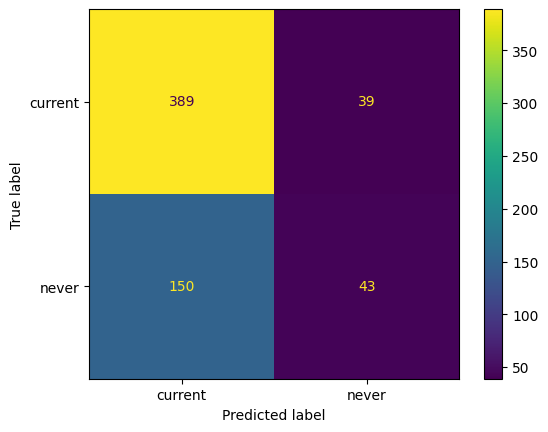

In [15]:
conf_matrix = confusion_matrix(yt, best_preds)
conf_display = ConfusionMatrixDisplay(conf_matrix, display_labels=list(set(yt)))
conf_display.plot()

## Clustering Results

Hierarchical clustering was run with various cobinations of distance metrics and linkage types. Ultimately, the most accurate model used euclidean distance with complete linkage, and gave an accuracy of 69.6%. Most of the models were in the mid-high 60s, however euclidean distance with ward linkage performed the worst, with an accuracy of only 57.6%. Overall, Hierarchical clustering proved to be a very underwhelming model for this dataset. Based on the confusion matrix, it appears that the model has a very strong bias towards predicting that an observation is that of a current smoker. While it's true that the data contains more smokers than non-smokers, the ratio is far from reality.

## Model 3: Matrix Factorization

The last unsupervised learning model that will be used is Matrix Factorization. This will use Scikit-Learn's `NMF` model to categorize the data.

In [16]:
class NMF_Wrapper:
    def __init__(self, x, yt, beta_loss='frobenius', solver='cd', init=None, max_iter=200):
        self.x = x
        self.yt = yt
        self.model = NMF(n_components=2, random_state=42, beta_loss=beta_loss, solver=solver, init=init, max_iter=max_iter)

    def fit(self):
        self.W = self.model.fit_transform(self.x)

    def predict(self):
        self.yp = np.argmax(self.W, axis=1)

    def score(self):
        smoke_1 = np.array(['current' if x == 1 else 'never' for x in self.yp])
        smoke_0 = np.array(['current' if x == 0 else 'never' for x in self.yp])
        acc_1 = np.mean(smoke_1 == self.yt)
        acc_0 = np.mean(smoke_0 == self.yt)

        if acc_1 > acc_0:
            self.predicted = smoke_1
            return acc_1
        else:
            self.predicted = smoke_0
            return acc_0

    def confusion_matrix(self):
        confusion = confusion_matrix(self.yt, self.predicted)
        disp = ConfusionMatrixDisplay(confusion, display_labels=list(set(self.yt)))
        return disp

    def full_run(self):
        self.fit()
        self.predict()
        accuracy = self.score()
        disp = self.confusion_matrix()
        return accuracy, disp

0.6892109500805152


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


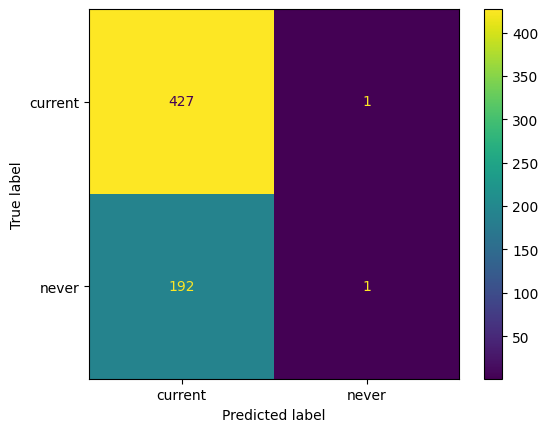

In [17]:
model = NMF_Wrapper(data_x, yt)
acc, disp = model.full_run()
print(acc)
disp.plot()

## NMF Initial Results

The baseline NMF model above resulted in a very poor accuracy, essentially assigning the `current` label to nearly every observation. Further analysis with different tuning parameters will be performed.

In [18]:
frob_scores=[]
frob_disps=[]
kl_scores=[]
kl_disps=[]
iter_counts=[]
for i in range(500, 1501, 100):
    iter_counts.append(i)
    frob = NMF_Wrapper(data_x, yt, max_iter=i)
    kl = NMF_Wrapper(data_x, yt, max_iter=i, beta_loss='kullback-leibler', solver='mu')

    f_score, f_disp = frob.full_run()
    frob_scores.append(f_score)
    frob_disps.append(f_disp)

    kl_score, kl_disp = kl.full_run()
    kl_scores.append(kl_score)
    kl_disps.append(kl_disp)


    

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 600 reached. Increase it to improve convergence.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 700 reached. Increase it to improve convergence.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 800 reached. Increase it to improve convergence.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklear

<Figure size 640x480 with 0 Axes>

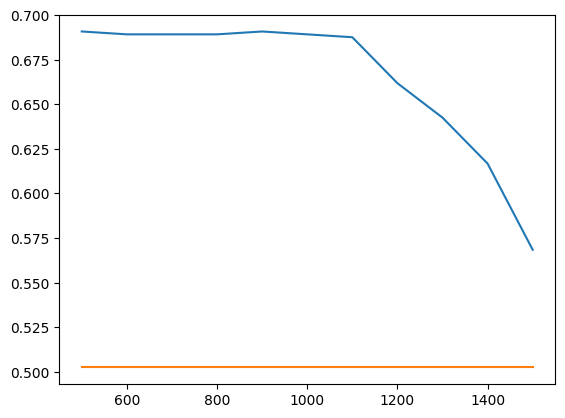

<Figure size 640x480 with 0 Axes>

In [19]:
plt.plot(iter_counts, frob_scores, label='Frobenius')
plt.plot(iter_counts, kl_scores, label='kullback-leibler')
plt.figure()

In [20]:
frob_max_idx = np.argmax(frob_scores)
kl_max_idx = np.argmax(kl_scores)

print(f'Most accurate Frobenius Model: {frob_scores[frob_max_idx]}')
print(f'Most accurate Kullback-Leibler Model: {kl_scores[kl_max_idx]}')

frob_matrix = frob_disps[frob_max_idx]
kl_matrix = kl_disps[kl_max_idx]


Most accurate Frobenius Model: 0.6908212560386473
Most accurate Kullback-Leibler Model: 0.5024154589371981


### Frobenius Confustion Matrix

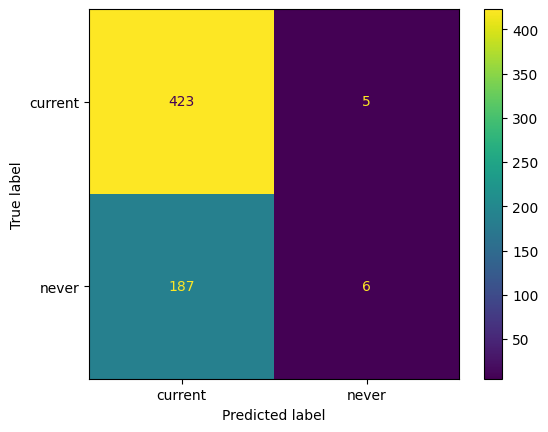

In [21]:
frob_matrix.plot()

### Kullback-Leibler

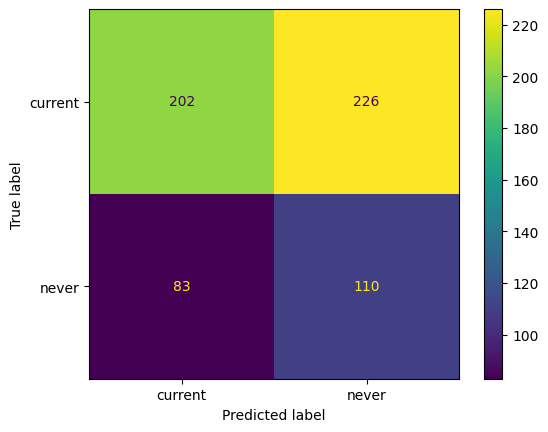

In [22]:
kl_disp.plot()

## NMF Discussion

Even with different loss functions and a wide range of max iterations, the NMF models were not able to improve on the accuracy achieved by the best hierarchical clustering model. The best NMF model was using the Frobenius loss function, and had an accuracy of 69.1%. As shown by the confusion matrix above, the model continued to predict the majority of cases as `current` smokers, much more frequently than was justified by the data. 

The Kullback-Leibler model moved the other direction, and predicted most subjects as `never` smokers. and had an accuracy of only 50.2%

## Further Analysis

Given the outputs of the various unsupervised models shown above, it is difficult to draw any major conclusions about the data. While PCA showed which features were responsible for the variance in the data, Hierarchical Clustering and NMF were not able to use that variance to categorize `current` vs `never` smokers. This would seem to suggest that much of the variance in the data simply isn't correlated with smoking status. As a final test of the data, we will run a supervised Logistic Regression algorithm to determine if there is still some benefit to studying this dataset.

In [23]:
yt_encoded = [1 if y == 'current' else 0 for y in yt]
X_train, X_test, y_train, y_test = train_test_split(data_x, yt_encoded, test_size=0.2, random_state=42)


In [24]:
reg = LogisticRegression(max_iter=200)
reg.fit(X_train, y_train)

train_score = reg.score(X_train, y_train)
test_score = reg.score(X_test, y_test)

print(f'Training Accuracy: {train_score}')
print(f'Test Accuracy: {test_score}')

Training Accuracy: 0.6915322580645161
Test Accuracy: 0.688


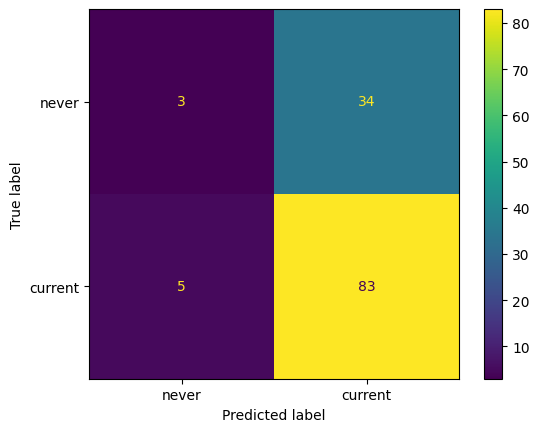

In [25]:
test_pred = reg.predict(X_test)
reg_conf = confusion_matrix(y_test, test_pred)
reg_disp = ConfusionMatrixDisplay(reg_conf, display_labels=['never', 'current'])
reg_disp.plot()

In [26]:
X_train_influential = X_train.to_numpy()[:, sorted(list(pc1_indices))]
X_test_influential = X_test.to_numpy()[:, sorted(list(pc1_indices))]

inf_reg = LogisticRegression(max_iter=200)
inf_reg.fit(X_train_influential, y_train)

inf_train_score = inf_reg.score(X_train_influential, y_train)
inf_test_score = inf_reg.score(X_test_influential, y_test)

print(f'Training Accuracy: {inf_train_score}')
print(f'Test Accuracy: {inf_test_score}')

Training Accuracy: 0.6854838709677419
Test Accuracy: 0.704


## Regression Discussion

Surprisingly, the Logistic Regression model did not prove to be much more accurate than the unsupervised models. At baseline, the regression model had a training accuracy of 69.2%, and a test accuracy of 68.8%. There was one final attempt at improving the accuracy, by using the previous PCA results to restrict the regression to only the top 5 influential features. This yeilded only a slight improvement in test accuracy, at 70.4%. The confusion matrix above shows the same tendency towards over-predicting `current` smokers.

## Results

| Model    | Accuracy |
| -------- | ------- |
| Hierarchical Clustering | 69.6% |
| NMF - Frobenius | 69.1% |
| NMF - Kullback-Leibler | 50.2% |
| Logistic Regression (All Features) | 68.8% |
| Logistic Regression (PCA-Identified Features) | 70.4% |


## Conclusions

Analysis of this dataset proved to be very interesting. Initially, when the unsupervised models struggled to achieve high accuracy scores, I suspected that the dataset was simply not ideal for unsupervised learning. After seeing the supervised Linear Regression model have similar struggles, I believe the features in the dataset may simply not be the strongest predictors of smoking status. Perhaps this is a sign to the researchers they need to identify other genes to look at, or even look at features besides the CpG site methylation.